<a href="https://colab.research.google.com/github/ADIthaker/Credit-Card-Fraud-Detection/blob/master/Credit_Card.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset and XGBoost Dowload

In [1]:
! pip install kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

 71% 47.0M/66.0M [00:00<00:00, 101MB/s] 
100% 66.0M/66.0M [00:00<00:00, 147MB/s]


In [8]:
! unzip -q creditcardfraud.zip

In [9]:
! git clone --recursive https://github.com/dmlc/xgboost
! cd xgboost
! make -j4

Cloning into 'xgboost'...
remote: Enumerating objects: 46920, done.
remote: Counting objects: 100% (363/363), done.
remote: Compressing objects: 100% (279/279), done.
remote: Total 46920 (delta 140), reused 207 (delta 74), pack-reused 46557
Receiving objects: 100% (46920/46920), 20.98 MiB | 20.72 MiB/s, done.
Resolving deltas: 100% (28615/28615), done.
Submodule 'cub' (https://github.com/NVlabs/cub) registered for path 'cub'
Submodule 'dmlc-core' (https://github.com/dmlc/dmlc-core) registered for path 'dmlc-core'
Submodule 'gputreeshap' (https://github.com/rapidsai/gputreeshap.git) registered for path 'gputreeshap'
Cloning into '/content/xgboost/cub'...
remote: Enumerating objects: 34384, done.        
remote: Counting objects: 100% (653/653), done.        
remote: Compressing objects: 100% (302/302), done.        
remote: Total 34384 (delta 409), reused 506 (delta 349), pack-reused 33731        
Receiving objects: 100% (34384/34384), 17.51 MiB | 24.83 MiB/s, done.
Resolving deltas: 10

In [13]:
! make -j4 --directory=xgboost

make: Entering directory '/content/xgboost'
Makefile:23: MAKE [make] - checked OK
g++ -c -DDMLC_LOG_CUSTOMIZE=1 -std=c++14 -Wall -Wno-unknown-pragmas -Iinclude  -Idmlc-core/include -Irabit/include -I/include -O3 -funroll-loops amalgamation/xgboost-all0.cc -o amalgamation/xgboost-all0.o
make: Leaving directory '/content/xgboost'


In [ ]:
! python ./xgboost/python-package/setup.py install

In [24]:
! pip install conda
! conda install libgcc

     |████████████████████████████████| 299 kB 29.7 MB/s 
     |████████████████████████████████| 66 kB 5.0 MB/s 
     |████████████████████████████████| 108 kB 58.5 MB/s 
     |████████████████████████████████| 546 kB 49.1 MB/s 
  Created wheel for conda: filename=conda-4.3.16-py3-none-any.whl size=336960 sha256=0fbba7ede94b670238c72150e6fc2e9a0a07e346483b837c49e8833b0dfdc9e0
  Stored in directory: /root/.cache/pip/wheels/66/ec/2c/cce33d7a071720882d948fd3364d3ff5562bac9e5638768d41
  Created wheel for pycosat: filename=pycosat-0.6.3-cp37-cp37m-linux_x86_64.whl size=143861 sha256=69d03dc883e4bea196b368728021f92d11e87ea8ade24d307733779e6d26963d
  Stored in directory: /root/.cache/pip/wheels/c8/29/0e/a226b7c5a4f24e246f25201c0b1fbf6fb8f19f9cce89b02c36
Successfully built conda pycosat
ERROR: The install method you used for conda--probably either `pip install conda`
or `easy_install conda`--is not compatible with using conda as an application.
If your intention is to install conda as a stand

In [25]:
import xgboost as xgb


In [26]:
! pip install lightgbm


In [27]:
! pip install fastcluster hdbscan tslearn

     |████████████████████████████████| 155 kB 36.4 MB/s 
     |████████████████████████████████| 6.4 MB 37.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 793 kB 31.2 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311886 sha256=c9d26a46f51587b95dbdfd3d9520d707de4127ac0cb02de3434b693b5a008bbc
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


# Credit Card Fraud Detection

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()

In [37]:
%matplotlib inline
'''Data Prep'''
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
'''Algos'''
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
import os

In [40]:
curr_path = os.getcwd()
file = '/creditcard.csv'
data = pd.read_csv(curr_path + file)

In [41]:
data.head(15)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [42]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [43]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [44]:
data["Class"].sum()

492

In [46]:
nanCounter = np.isnan(data).sum()
nanCounter

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [48]:
distinctCounter = data.apply(lambda x: len(x.unique()))
distinctCounter

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [49]:
dataX = data.copy().drop(["Class"], axis=1)
dataY = data["Class"].copy()

In [50]:
featuresToScale = dataX.drop(["Time"], axis=1).columns
sX = pp.StandardScaler(copy=True)
dataX.loc[:,featuresToScale] = sX.fit_transform(dataX[featuresToScale])

In [51]:
dataX.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05
mean,94813.859575,-8.157366e-16,3.154853e-17,-4.409878e-15,-6.734811e-16,-2.874435e-16,4.168992e-16,-8.767997e-16,-2.423604e-16,3.078727e-16,2.026926e-17,1.622758e-15,2.052953e-15,-8.310622e-17,-8.845502e-16,-1.789241e-15,-1.542079e-16,8.046919e-16,-2.547965e-16,-4.550555e-16,2.754870e-16,1.685077e-17,1.478472e-15,-6.797197e-16,1.234659e-16,-7.659279e-16,3.247603e-16,-2.953495e-18,5.401572e-17,3.202236e-16
std,47488.145955,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,0.000000,-2.879855e+01,-4.403529e+01,-3.187173e+01,-4.013919e+00,-8.240810e+01,-1.963606e+01,-3.520940e+01,-6.130252e+01,-1.222802e+01,-2.258191e+01,-4.700128e+00,-1.869868e+01,-5.819392e+00,-2.004428e+01,-4.915191e+00,-1.612534e+01,-2.962645e+01,-1.133266e+01,-8.861402e+00,-7.069146e+01,-4.741907e+01,-1.506565e+01,-7.175446e+01,-4.683638e+00,-1.975033e+01,-5.401098e+00,-5.590660e+01,-4.674612e+01,-3.532294e-01
25%,54201.500000,-4.698918e-01,-3.624707e-01,-5.872142e-01,-5.993788e-01,-5.010686e-01,-5.766822e-01,-4.478860e-01,-1.746805e-01,-5.853631e-01,-4.917360e-01,-7.470224e-01,-4.058964e-01,-6.516198e-01,-4.439565e-01,-6.368132e-01,-5.341353e-01,-5.695609e-01,-5.951621e-01,-5.605369e-01,-2.746334e-01,-3.109433e-01,-7.473476e-01,-2.591784e-01,-5.854676e-01,-6.084001e-01,-6.780717e-01,-1.755053e-01,-1.604440e-01,-3.308401e-01
50%,84692.000000,9.245351e-03,3.965683e-02,1.186124e-01,-1.401724e-02,-3.936682e-02,-2.058046e-01,3.241723e-02,1.871982e-02,-4.681169e-02,-8.533551e-02,-3.209268e-02,1.401448e-01,-1.363250e-02,5.278702e-02,5.251917e-02,7.579255e-02,-7.732604e-02,-4.338370e-03,4.588014e-03,-8.104705e-02,-4.009429e-02,9.345377e-03,-1.792420e-02,6.765678e-02,3.183240e-02,-1.081217e-01,3.325174e-03,3.406368e-02,-2.652715e-01
75%,139320.500000,6.716939e-01,4.867202e-01,6.774569e-01,5.250082e-01,4.433465e-01,2.991625e-01,4.611107e-01,2.740785e-01,5.435305e-01,4.168842e-01,7.245863e-01,6.187332e-01,6.656518e-01,5.144513e-01,7.088502e-01,5.971989e-01,4.705737e-01,5.974968e-01,5.637928e-01,1.725733e-01,2.537392e-01,7.283360e-01,2.364319e-01,7.257153e-01,6.728006e-01,4.996663e-01,2.255648e-01,2.371526e-01,-4.471707e-02
max,172792.000000,1.253351e+00,1.335775e+01,6.187993e+00,1.191874e+01,2.521413e+01,5.502015e+01,9.747824e+01,1.675153e+01,1.419494e+01,2.180758e+01,1.177504e+01,7.854679e+00,7.160735e+00,1.098147e+01,9.699117e+00,1.976044e+01,1.089502e+01,6.014342e+00,6.869414e+00,5.113464e+01,3.703471e+01,1.447304e+01,3.607668e+01,7.569684e+00,1.442532e+01,7.293975e+00,7.831940e+01,1.025434e+02,1.023622e+02


In [52]:
correlationMatrix = pd.DataFrame(data=[],index=dataX.columns,
columns=dataX.columns)
for i in dataX.columns:
  for j in dataX.columns:
    correlationMatrix.loc[i,j] = np.round(pearsonr(dataX.loc[:,i],
     dataX.loc[:,j])[0],2)

Text(0, 0.5, 'Frequency Percentage')

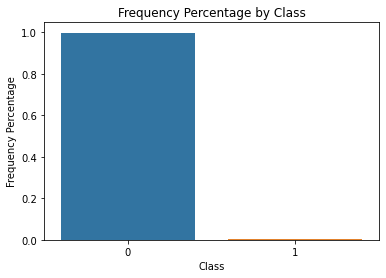

In [55]:
count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
ax = sns.barplot(x=count_classes.index, y=np.array(tuple(count_classes/len(data))))
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency Percentage')

In [56]:
X_train, X_test, y_train, y_test = train_test_split(dataX,
dataY, test_size=0.33,
random_state=2018, stratify=dataY)

In [57]:
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2018)

## Logistic Regression

In [67]:
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
logReg = LogisticRegression(penalty=penalty, C=C,
class_weight=class_weight, random_state=random_state,
solver=solver)

In [68]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],index=y_train.index, columns=[0,1])
model = logReg
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

  model.fit(X_train_fold, y_train_fold)
  logLossTraining = log_loss(y_train_fold, model.predict_proba(X_train_fold)[:,1])
  trainingScores.append(logLossTraining)
  predictionsBasedOnKFolds.loc[X_cv_fold.index, :] = model.predict_proba(X_cv_fold)
  logLossCv = log_loss(y_cv_fold, 
                       predictionsBasedOnKFolds.loc[X_cv_fold.index, 1])
  cvScores.append(logLossCv)
  print('Training Log Loss: ', logLossTraining)
  print('CV Log Loss: ', logLossCv)
loglossLogisticRegression = log_loss(y_train,
  predictionsBasedOnKFolds.loc[:,1])
print('Logistic Regression Log Loss: ', loglossLogisticRegression)

Training Log Loss:  0.10966450675373615
CV Log Loss:  0.10878937377819534
Training Log Loss:  0.10456253075352834
CV Log Loss:  0.10403949182025926
Training Log Loss:  0.1153865429073515
CV Log Loss:  0.11764573298351307
Training Log Loss:  0.11558015904920611
CV Log Loss:  0.11816691615677673
Training Log Loss:  0.09709819816667246
CV Log Loss:  0.09697807129012978
Logistic Regression Log Loss:  0.10912391720577486


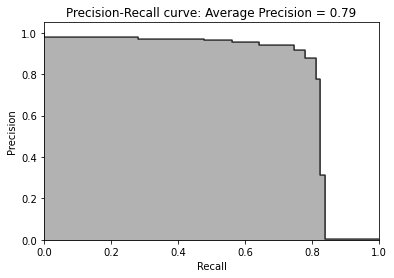

In [82]:
def getPreds(y_train, predictionsBasedOnKFolds):
  preds = pd.concat([y_train, predictionsBasedOnKFolds.loc[:,1]], axis=1)
  preds.columns = ["trueLabel", 'prediction']
  return preds

preds = getPreds(y_train, predictionsBasedOnKFolds)
predictionsBasedOnKFoldsLogistic = preds.copy()
def prCurve(preds):
  precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],
                                                        preds['prediction'])
  average_precision = average_precision_score(preds['trueLabel'],
                                              preds['prediction'])
  plt.step(recall, precision, color="k",alpha=0.7, where='post')
  plt.fill_between(recall, precision,step="post", alpha=0.3, color="k")
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.ylim([0.0, 1.05])
  plt.xlim([0.0, 1.0])
  plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
  average_precision))
prCurve(preds)

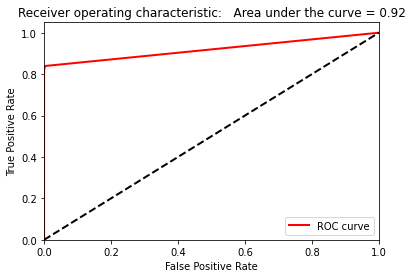

In [83]:
def rocCurve(preds):
  fpr, tpr, thresholds = roc_curve(preds['trueLabel'],preds['prediction'])
  areaUnderROC = auc(fpr, tpr)
  plt.figure()
  plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
  plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic: \
  Area under the curve = {0:0.2f}'.format(areaUnderROC))
  plt.legend(loc="lower right")
  plt.show()
rocCurve(preds)

## Random Forest Classifier

In [84]:
n_estimators = 10
max_features = 'auto'
max_depth = None
min_samples_split = 2
min_samples_leaf = 1
min_weight_fraction_leaf = 0.0
max_leaf_nodes = None
bootstrap = True
oob_score = False
n_jobs = -1
random_state = 2018
class_weight = 'balanced'
RFC = RandomForestClassifier(n_estimators=n_estimators,
max_features=max_features, max_depth=max_depth,
min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
min_weight_fraction_leaf=min_weight_fraction_leaf,
max_leaf_nodes=max_leaf_nodes, bootstrap=bootstrap,
oob_score=oob_score, n_jobs=n_jobs, random_state=random_state,
class_weight=class_weight)

In [85]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
index=y_train.index,columns=[0,1])
model = RFC
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
  y_train.ravel()):
  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
  X_train.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], \
  y_train.iloc[cv_index]
  model.fit(X_train_fold, y_train_fold)
  loglossTraining = log_loss(y_train_fold, \
  model.predict_proba(X_train_fold)[:,1])
  trainingScores.append(loglossTraining)
  predictionsBasedOnKFolds.loc[X_cv_fold.index,:] = \
  model.predict_proba(X_cv_fold)
  loglossCV = log_loss(y_cv_fold, \
  predictionsBasedOnKFolds.loc[X_cv_fold.index,1])
  cvScores.append(loglossCV)
  print('Training Log Loss: ', loglossTraining)
  print('CV Log Loss: ', loglossCV)
loglossRandomForestsClassifier = log_loss(y_train,
predictionsBasedOnKFolds.loc[:,1])
print('Random Forests Log Loss: ', loglossRandomForestsClassifier)

Training Log Loss:  0.0004717456539906082
CV Log Loss:  0.009958407581679842
Training Log Loss:  0.00039391696555908875
CV Log Loss:  0.012614958898596576
Training Log Loss:  0.0003955086800568252
CV Log Loss:  0.008311598856605153
Training Log Loss:  0.0004174848852259459
CV Log Loss:  0.009209166975528824
Training Log Loss:  0.00042710655140527107
CV Log Loss:  0.014292100977712807
Random Forests Log Loss:  0.01087724665802464


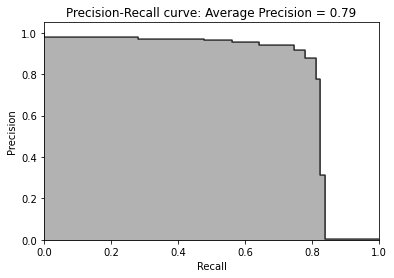

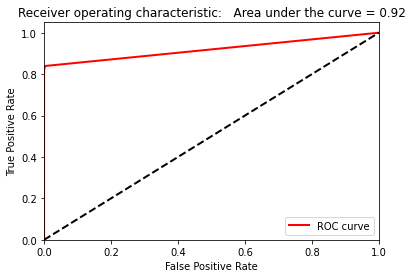

In [86]:
preds = getPreds(y_train, predictionsBasedOnKFolds)
predictionsBasedOnKFoldsRF = preds.copy()
prCurve(preds)
rocCurve(preds)

## XGBoost

In [87]:
params_xGB = {
    'nthread':16,
    'learning_rate':0.3,
    'gamma':0,
    'max_depth': 6,
    'min_child_weight':1,
    'max_delta_step':0,
    'subsample':1.0,
    'colsample_bytree':1.0,
    'objective': 'binary:logistic',
    'num_class':1,
    'eval_metric':'logloss',
    'seed': 2018,
    'silent':1
}

In [89]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[],
index=y_train.index,columns=['prediction'])
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
  y_train.ravel()):
  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], \
  X_train.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index], \
  y_train.iloc[cv_index]
  dtrain = xgb.DMatrix(data=X_train_fold, label=y_train_fold)
  dCV = xgb.DMatrix(data=X_cv_fold)
  bst = xgb.cv(params_xGB, dtrain, num_boost_round=2000,
  nfold=5, early_stopping_rounds=200, verbose_eval=50)
  best_rounds = np.argmin(bst['test-logloss-mean'])
  bst = xgb.train(params_xGB, dtrain, best_rounds)
  loglossTraining = log_loss(y_train_fold, bst.predict(dtrain))
  trainingScores.append(loglossTraining)
  predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] = \
  bst.predict(dCV)
  loglossCV = log_loss(y_cv_fold, \
  predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
  cvScores.append(loglossCV)
  print('Training Log Loss: ', loglossTraining)
  print('CV Log Loss: ', loglossCV)
loglossXGBoostGradientBoosting = \
log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('XGBoost Gradient Boosting Log Loss: ', loglossXGBoostGradientBoosting)

[0]	train-logloss:0.437929+5.24382e-05	test-logloss:0.438071+4.12534e-05
[50]	train-logloss:0.0001446+5.4626e-06	test-logloss:0.0032646+0.000441828
[100]	train-logloss:5.82e-05+7.48331e-07	test-logloss:0.0035686+0.00049924
[150]	train-logloss:4.26e-05+4.89898e-07	test-logloss:0.003685+0.000546123
[200]	train-logloss:3.64e-05+4.89898e-07	test-logloss:0.0037592+0.00055965
Training Log Loss:  0.0009698748139954727
CV Log Loss:  0.0023983441021560694
[0]	train-logloss:0.437907+5.28674e-05	test-logloss:0.438001+5.7763e-05
[50]	train-logloss:0.000132+4.42719e-06	test-logloss:0.003126+0.000311441
[100]	train-logloss:5.6e-05+1.78885e-06	test-logloss:0.0034084+0.000386347
[150]	train-logloss:4.1e-05+8.94427e-07	test-logloss:0.0035036+0.000418524
[200]	train-logloss:3.52e-05+9.79796e-07	test-logloss:0.0035732+0.000425153
Training Log Loss:  0.000872351723518117
CV Log Loss:  0.0031189630212641204
[0]	train-logloss:0.437982+4.83802e-05	test-logloss:0.438069+7.20017e-05
[50]	train-logloss:0.000145

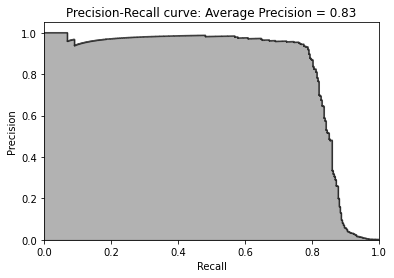

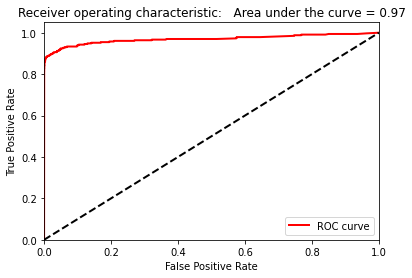

In [93]:
preds = pd.concat([y_train, predictionsBasedOnKFolds.loc[:]], axis=1)
preds.columns = ["trueLabel", 'prediction']
predictionsBasedOnKFoldsXGB = preds.copy()
prCurve(preds)
rocCurve(preds)

## LightGBM

In [94]:
params_lightGB = {
'task': 'train',
'application':'binary',
'num_class':1,
'boosting': 'gbdt',
'objective': 'binary',
'metric': 'binary_logloss',
'metric_freq':50,
'is_training_metric':False,
'max_depth':4,
'num_leaves': 31,
'learning_rate': 0.01,
'feature_fraction': 1.0,
'bagging_fraction': 1.0,
'bagging_freq': 0,
'bagging_seed': 2018,
'verbose': 0,
'num_threads':16
}

In [95]:
trainingScores = []
cvScores = []
predictionsBasedOnKFolds = pd.DataFrame(data=[], index=y_train.index,columns=['prediction'])
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)),
  y_train.ravel()):
  X_train_fold, X_cv_fold = X_train.iloc[train_index,:], X_train.iloc[cv_index,:]
  y_train_fold, y_cv_fold = y_train.iloc[train_index],y_train.iloc[cv_index]
  lgb_train = lgb.Dataset(X_train_fold, y_train_fold)
  lgb_eval = lgb.Dataset(X_cv_fold, y_cv_fold, reference=lgb_train)
  gbm = lgb.train(params_lightGB, lgb_train, num_boost_round=2000,
                  valid_sets=lgb_eval, early_stopping_rounds=200)
  loglossTraining = log_loss(y_train_fold, gbm.predict(X_train_fold, num_iteration=gbm.best_iteration))
  trainingScores.append(loglossTraining)
  predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'] =   gbm.predict(X_cv_fold, num_iteration=gbm.best_iteration)
  loglossCV = log_loss(y_cv_fold, \
  predictionsBasedOnKFolds.loc[X_cv_fold.index,'prediction'])
  cvScores.append(loglossCV)
  print('Training Log Loss: ', loglossTraining)
  print('CV Log Loss: ', loglossCV)
loglossLightGBMGradientBoosting = log_loss(y_train, predictionsBasedOnKFolds.loc[:,'prediction'])
print('LightGBM gradient boosting Log Loss: ', loglossLightGBMGradientBoosting)

[1]	valid_0's binary_logloss: 0.00634115
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's binary_logloss: 0.00627492
[3]	valid_0's binary_logloss: 0.00620527
[4]	valid_0's binary_logloss: 0.00616014
[5]	valid_0's binary_logloss: 0.00609608
[6]	valid_0's binary_logloss: 0.0060474
[7]	valid_0's binary_logloss: 0.0059922
[8]	valid_0's binary_logloss: 0.00593688
[9]	valid_0's binary_logloss: 0.00588275
[10]	valid_0's binary_logloss: 0.00582962
[11]	valid_0's binary_logloss: 0.00577838
[12]	valid_0's binary_logloss: 0.00573037
[13]	valid_0's binary_logloss: 0.00568343
[14]	valid_0's binary_logloss: 0.00563845
[15]	valid_0's binary_logloss: 0.00559177
[16]	valid_0's binary_logloss: 0.00554777
[17]	valid_0's binary_logloss: 0.00550471
[18]	valid_0's binary_logloss: 0.00546175
[19]	valid_0's binary_logloss: 0.00542175
[20]	valid_0's binary_logloss: 0.00538166
[21]	valid_0's binary_logloss: 0.00534326
[22]	valid_0's binary_logloss: 0.00530349
[23]	valid_0's binary_lo

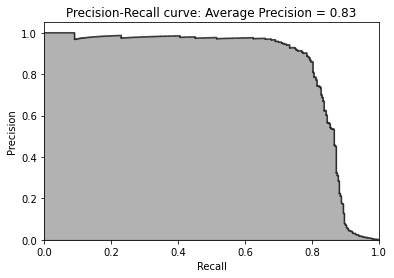

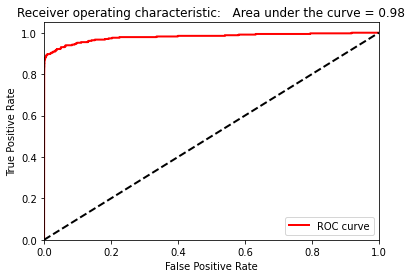

In [96]:
preds = pd.concat([y_train, predictionsBasedOnKFolds.loc[:]], axis=1)
preds.columns = ["trueLabel", 'prediction']
predictionsBasedOnKFoldsLGB = preds.copy()
prCurve(preds)
rocCurve(preds)

## Testing

In [99]:
predictionsTestSetLogisticRegression = pd.DataFrame(data=[],index=y_test.index,columns=['prediction','trueLabel'])
predictionsTestSetLogisticRegression.loc[:,'prediction'] = logReg.predict_proba(X_test)[:,1]
predictionsTestSetLogisticRegression.loc[:,'trueLabel'] = y_test
logLossTestSetLogisticRegression = log_loss(y_test, predictionsTestSetLogisticRegression['prediction'])
print("Log Loss of Logistic Regression:", logLossTestSetLogisticRegression)

predictionsTestSetRandomForests = pd.DataFrame(data=[],index=y_test.index,columns=['prediction','trueLabel'])
predictionsTestSetRandomForests.loc[:,'prediction'] = RFC.predict_proba(X_test)[:,1]
predictionsTestSetRandomForests.loc[:,'trueLabel'] = y_test
logLossTestSetRandomForests = log_loss(y_test, predictionsTestSetRandomForests['prediction'])
print("Log Loss of Random Forest:", logLossTestSetRandomForests)

predictionsTestSetXGBoostGradientBoosting = pd.DataFrame(data=[],index=y_test.index,columns=['prediction','trueLabel'])
dtest = xgb.DMatrix(data=X_test)
predictionsTestSetXGBoostGradientBoosting.loc[:,'prediction'] = bst.predict(dtest)
predictionsTestSetXGBoostGradientBoosting.loc[:,'trueLabel'] = y_test
logLossTestSetXGBoostGradientBoosting = log_loss(y_test, predictionsTestSetXGBoostGradientBoosting['prediction'])
print("Log Loss of XGBoost:", logLossTestSetXGBoostGradientBoosting)

predictionsTestSetLightGBMGradientBoosting = pd.DataFrame(data=[],index=y_test.index,columns=['prediction','trueLabel'])
predictionsTestSetLightGBMGradientBoosting.loc[:,'prediction'] = gbm.predict(X_test, num_iteration=gbm.best_iteration)
predictionsTestSetLightGBMGradientBoosting.loc[:,'trueLabel'] = y_test
logLossTestSetLightGBMGradientBoosting = log_loss(y_test, predictionsTestSetLightGBMGradientBoosting['prediction'])
print("Log Loss of LightGBoost:", logLossTestSetLightGBMGradientBoosting)

Log Loss of Logistic Regression: 0.09674819407933428
Log Loss of Random Forest: 0.009038985836715724
Log Loss of XGBoost: 0.002424374472450827
Log Loss of LightGBoost: 0.002516958317012632


### Logistic Regression

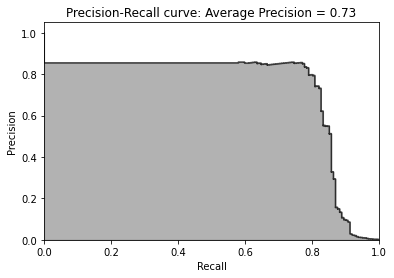

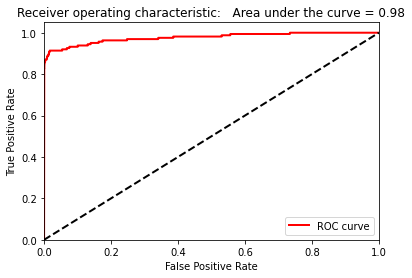

In [100]:
prCurve(predictionsTestSetLogisticRegression)
rocCurve(predictionsTestSetLogisticRegression)

### Random Forest

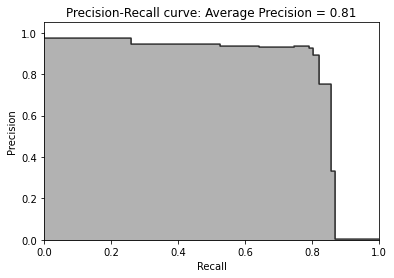

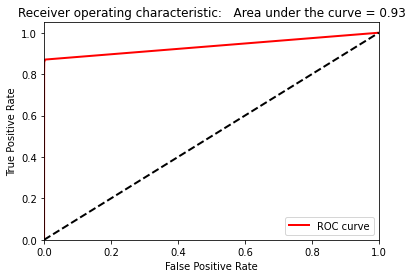

In [101]:
prCurve(predictionsTestSetRandomForests)
rocCurve(predictionsTestSetRandomForests)

### XGBoost

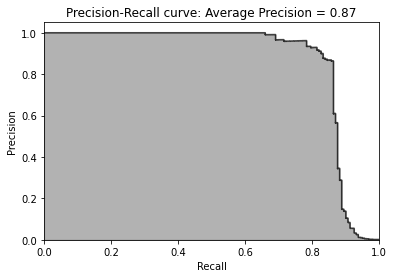

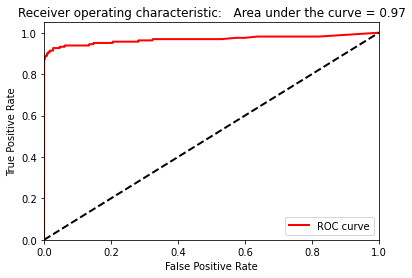

In [102]:
prCurve(predictionsTestSetXGBoostGradientBoosting)
rocCurve(predictionsTestSetXGBoostGradientBoosting)

### LightGBM

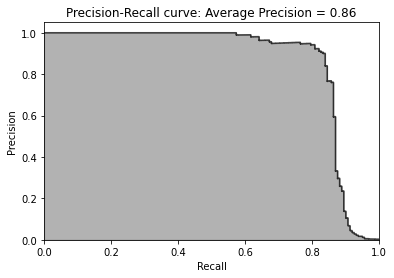

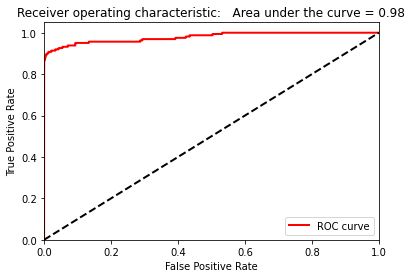

In [103]:
prCurve(predictionsTestSetLightGBMGradientBoosting)
rocCurve(predictionsTestSetLightGBMGradientBoosting)

## Conclusion

The results of LightGBM gradient boosting are impressive—we can catch over
80% of the fraudulent transactions with nearly 90% precision (in other words, in
catching 80% of the total fraud the LightGBM model gets only 10% of the cases
wrong).

In [104]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Credit_Card.ipynb')

--2021-08-05 09:25:52--  https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1864 (1.8K) [text/plain]
Saving to: ‘colab_pdf.py’

colab_pdf.py        100%[===================>]   1.82K  --.-KB/s    in 0s      

2021-08-05 09:25:52 (23.7 MB/s) - ‘colab_pdf.py’ saved [1864/1864]

Mounted at /content/drive/




Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Credit_Card.ipynb to pdf
[NbConvertApp] Support files will be in Credit_Card_files/
[NbConvertApp] Making directory ./Credit_Card_files
[NbConvertApp] Making directory ./Credit_Card_files
[NbConvertApp] Making directory ./Credit_Card_files
[NbConvertApp] Making directory ./Credi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'